# Datos

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [2]:
!pip install comet_ml

#import comet_ml at the top of your file
from comet_ml import Experiment

     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 522kB 13.4MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=10f3e6bdf5b4dcd8127ad85dc69f698cb4fd421c3d47699b56eaf39d03f33610
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [22]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Descarga de datos
!kaggle datasets download -d giantuji/UjiIndoorLoc


UjiIndoorLoc.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df = pd.read_csv(zip_file.open('TrainingData.csv'))
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-92,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [24]:
df = df[df.BUILDINGID == 2]

In [25]:
df.groupby('FLOOR').count()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
FLOOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,...,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942
1,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,...,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162
2,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,...,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577
3,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,...,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709
4,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,...,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102


In [26]:
df_X = df.iloc[:,:520]
df_y = df['FLOOR']
print(df_X.shape)

df_X.values[df_X.values==100] = -105

df_X.describe()

(9492, 520)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,9492.0,9492.0,9492.0,9492.0,9492.000000,9492.000000,9492.0,9492.0,9492.0,9492.0,9492.000000,9492.000000,9492.0,9492.0,9492.0,9492.0,9492.0,9492.000000,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,...,9492.000000,9492.0,9492.000000,9492.000000,9492.0,9492.000000,9492.0,9492.0,9492.000000,9492.0,9492.0,9492.000000,9492.000000,9492.0,9492.000000,9492.000000,9492.0,9492.000000,9492.000000,9492.0,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.0,9492.000000,9492.000000,9492.000000,9492.0,9492.0
mean,-105.0,-105.0,-105.0,-105.0,-104.947429,-104.952381,-105.0,-105.0,-105.0,-105.0,-95.670459,-95.610725,-105.0,-105.0,-105.0,-105.0,-105.0,-104.996629,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,...,-101.237779,-105.0,-103.256110,-102.297619,-105.0,-101.941214,-105.0,-105.0,-97.440371,-105.0,-105.0,-104.707438,-104.742099,-105.0,-94.465971,-90.640013,-105.0,-104.698904,-104.730931,-105.0,-93.665508,-91.040139,-101.435314,-104.884745,-104.995786,-104.950063,-104.998104,-104.890434,-104.989359,-104.999157,-100.858618,-104.977244,-104.693321,-104.729246,-105.0,-94.616519,-91.131690,-104.968816,-105.0,-105.0
std,0.0,0.0,0.0,0.0,0.819808,0.904366,0.0,0.0,0.0,0.0,16.006752,16.046833,0.0,0.0,0.0,0.0,0.0,0.232238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.393026,0.0,7.025447,7.933704,0.0,9.762393,0.0,0.0,14.449390,0.0,0.0,2.704507,2.353956,0.0,16.995075,16.643209,0.0,2.729189,2.381283,0.0,17.481224,16.328249,9.421812,1.397950,0.290297,0.896282,0.131438,1.204776,0.437896,0.082113,10.403169,0.623283,2.750471,2.401185,0.0,17.243422,16.706524,0.670335,0.0,0.0
min,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,...,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0
25%,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,...,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0
50%,-

In [27]:
ap = (df_X.describe().iloc[2]>10).index
values = (df_X.describe().iloc[2]>10).values
ap_buil_2 = [ap[i] for i in range(len(values)) if values[i]==True]
df_X = df_X[ap_buil_2]
print(df_X.shape)
df_X.describe()

(9492, 53)


,WAP011,WAP012,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP073,WAP074,WAP077,WAP078,WAP082,WAP083,WAP084,WAP085,WAP087,WAP096,WAP097,WAP098,WAP099,WAP117,WAP118,WAP121,WAP122,WAP127,WAP128,WAP131,WAP132,WAP138,WAP139,WAP144,WAP145,WAP203,WAP204,WAP277,WAP332,WAP389,WAP478,WAP481,WAP489,WAP495,WAP496,WAP501,WAP502,WAP511,WAP516,WAP517
count,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000
mean,-95.670459,-95.610725,-99.401917,-96.644964,-96.016540,-98.244627,-98.029604,-95.243679,-95.075643,-100.586599,-100.200063,-95.875579,-95.373051,-97.561315,-97.590497,-94.942583,-94.640645,-96.754425,-96.396228,-96.835862,-96.800674,-94.118837,-98.183628,-98.130636,-97.422882,-97.493574,-95.678782,-95.406237,-95.638116,-95.598399,-96.551833,-96.885377,-95.304362,-95.374421,-99.306995,-99.034450,-97.740308,-97.349241,-99.114728,-99.089338,-98.315318,-98.235356,-98.630531,-99.865150,-101.237779,-97.440371,-94.465971,-90.640013,-93.665508,-91.040139,-100.858618,-94.616519,-91.131690
std,16.006752,16.046833,10.700655,11.918018,12.728429,10.677424,11.167524,14.992062,14.941038,10.509634,10.669868,12.027968,12.411924,12.261589,12.040406,12.494979,12.310737,14.356064,15.225661,12.347804,12.628657,14.192521,13.486289,13.505467,14.091302,14.098613,15.024686,15.279559,15.204655,15.295395,14.961157,14.568139,14.904294,14.875089,12.417022,13.235472,13.035006,13.806272,13.293126,13.357766,11.697029,11.325521,11.377125,11.435367,10.393026,14.449390,16.995075,16.643209,17.481224,16.328249,10.403169,17.243422,16.706524
min,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
25%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
50%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-97.500000,-

In [28]:
df_X.iloc[:,:] = 105 + df_X.values
df_X['FLOOR'] = df_y.values 

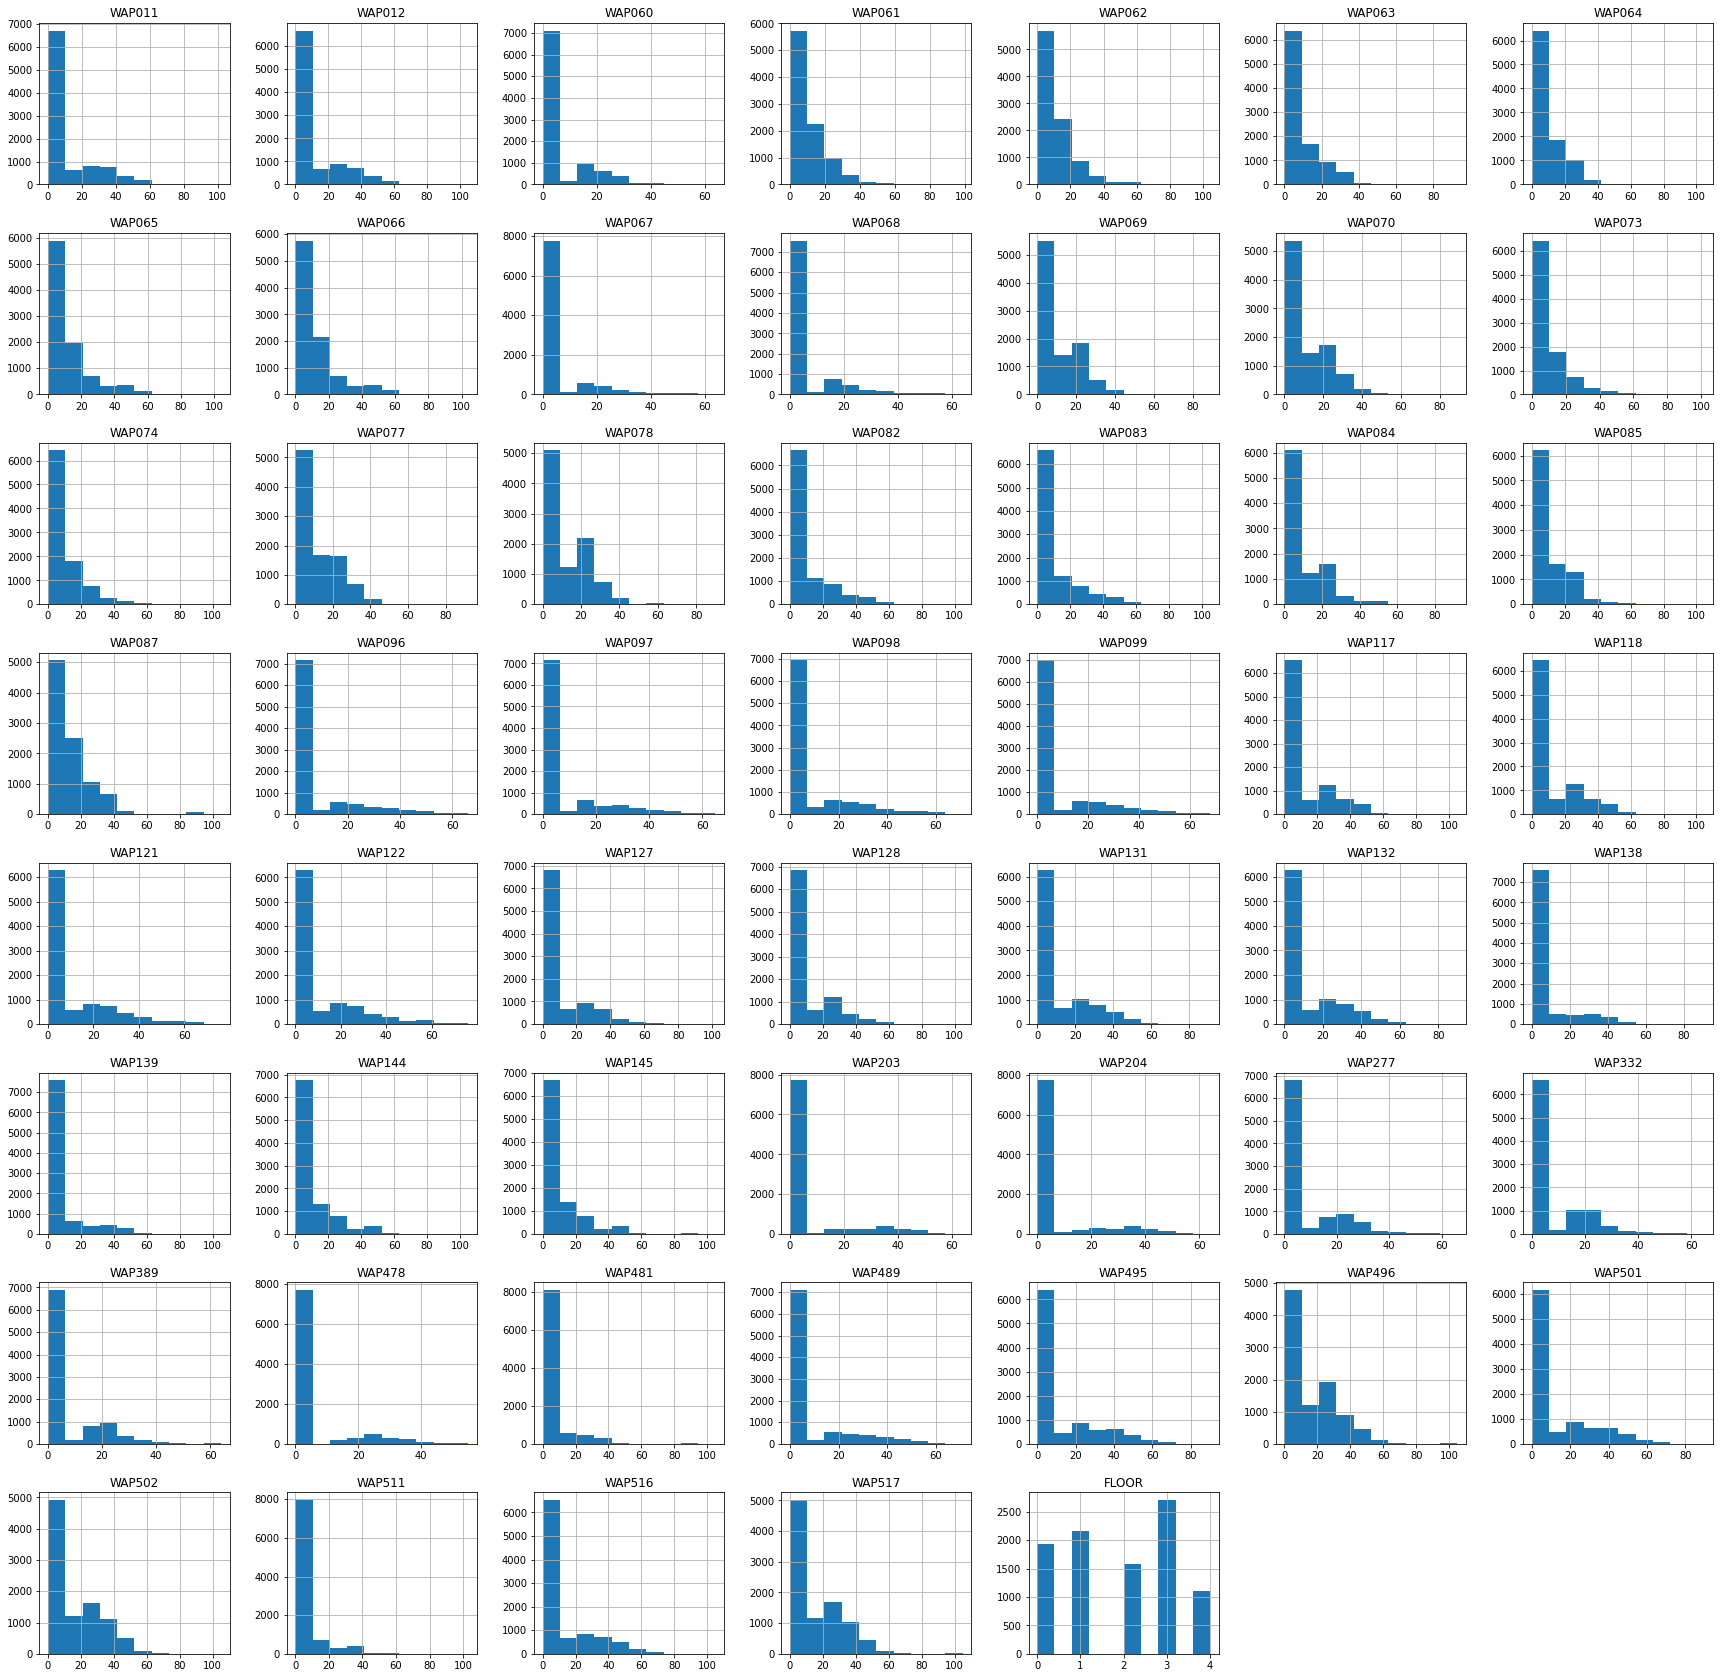

In [10]:
df_X.hist(figsize=[30,30])
plt.show()

In [29]:
import networkx as nx
!git clone https://github.com/alelab-upenn/graph-neural-networks
import sys
sys.path.append('/content/graph-neural-networks/')
#necesita hdf5storage ...
!pip install hdf5storage

import alegnn.modules.architectures as architectures
import alegnn.utils.graphML as graphML
# no sé porqué le cambian los parámetros por defecto a pyplot... por lo menos le saco el latex que en colab no funciona por defecto.
plt.rcParams.update({"text.usetex": False})

import torch

fatal: destination path 'graph-neural-networks' already exists and is not an empty directory.


In [30]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int)
y = enc.fit_transform(df_X['FLOOR'].values.reshape(-1,1))
X = df_X.iloc[:,:-1].values

In [31]:
import networkx as nx

def graph_creator(X_G, columns, th=10):
  df_data_train = pd.DataFrame(X_G, columns=columns)
  df_G = pd.DataFrame(columns = ['from', 'to', 'weight']) 

  for i in df_X.columns[:-1]:
    max_val = df_data_train[i].max()
    df_aux_i = df_data_train[df_data_train[i]  > (max_val - th)]
    df_aux_i = df_aux_i.drop(i, axis=1) 
    df_aux_i.head()

  for k, v in df_aux_i.mean().items():
    df_G = df_G.append({'from':i, 'to': k, 'weight': v}, ignore_index=True)

  G = nx.from_pandas_edgelist(df_G, source='from', target='to', edge_attr='weight')  # create_using=nx.DiGraph

  W = nx.to_numpy_array(G)
  # por último le saco la diagonal y la normalizo por su vector propio más grande
  np.fill_diagonal(W,0)
  (w,v) = scipy.sparse.linalg.eigs(W, k=1,which='LM')
  W = W/np.abs(w[0])

  return G, W

In [32]:
def train_model_simple(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    
  optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)

  train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
  loss = torch.nn.CrossEntropyLoss()
  for epoch in range(n_epochs):
      for x_batch, y_batch in train_loader:
        if y_batch.shape[0] == batch_size:
          model.zero_grad()
          y_hat = model(x_batch)
          loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
          loss_result.backward()
          optimizer.step()
        else:
          break

  for x_batch, y_batch in test_loader:
      y_hattest = model(x_batch)
    
  return (model, y_hattest)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import scipy
from sklearn.preprocessing import StandardScaler

In [16]:

#Create an experiment with your api key
experiment = Experiment(
    api_key="krnsqImdHJjs4Y1RdFTqfrtjd",
    project_name="aagrafos",
    workspace="facundolezama",
    log_code=True
)

experiment.set_name('ujiindoorloc BUILDING 2')
experiment.add_tag('ujiindoorloc BUILDING 2')

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/facundolezama/aagrafos/5c34c72d8d3b4a4fb5901fefdea51754



In [34]:
k=5

kf = KFold(n_splits=k)

lr_list = [1e-3, 1e-4]
bs_list = [64, 128] 
wd_list = [1e-3, 1e-4]
n_fil = [1, 3, 5]

param_grid = {'lr': lr_list, 'bs': bs_list, 'wd': wd_list, 'nfil': n_fil}

best_score = 0
best_params = None

columns = df_X.columns[:-1]

nodos = len(columns)

output_len = len(df_X['FLOOR'].value_counts())

epochs = 20

In [18]:
for param in list(ParameterGrid(param_grid)):

  ACC = 0
  for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    Graph, W = graph_creator(X_train_cv[:,:nodos+1], columns, th=10) #el grafo lo armo solo con los datos de 2.4Ghz
    gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[param['nfil'],param['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[1, 1], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)

    x_training_data = np.reshape(X_train_cv,(X_train_cv.shape[0],1,nodos))
    x_val_data = np.reshape(X_val_cv,(X_val_cv.shape[0],1,nodos))
    y_training_data = np.reshape(y_train_cv,(y_train_cv.shape[0],1,1))
    y_val_data = np.reshape(y_val_cv,(y_val_cv.shape[0],1,1))

    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
    val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_val_data).float(), torch.from_numpy(y_val_data).float())

    trained_gnn_model, y_pred = train_model_simple(gnn_model, train_data, val_data, n_epochs=epochs, epsilon=param['lr'], batch_size=param['bs'], weight_decay=param['wd'])

    m = torch.nn.Softmax(dim=1)
    output = m(y_pred)
    ACC += accuracy_score(y_val_cv, np.array(torch.argmax(output, axis=1)))/k

  if ACC > best_score:
      best_score = ACC
      best_params = param

  print("params: ", param)
  print("Accuracy: ", ACC) 
  print()

print("----------- BEST PARAMS --------------")
print("params: ", best_params)
print("Accuracy: ", best_score) 
print()


experiment.log_parameters({'tag': 'ujiindoorloc BUILDING 2', 'epochs': epochs, 'nodes': nodos, 'class_len': output_len, 'dimNodeSignals':[1, 20, 20]})
experiment.log_parameters(best_params)
experiment.log_metrics({"accuracy_val": best_score})

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.9661879054529836

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.9666092352971534

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.9629226407776041

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.9627124475141096

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.9577608091663795

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.0001}
Accuracy:  0.9630282923018104

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.9352220762855055

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.9384875074286227

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.9379603041032634

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.9345892769251856

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.9361694996701164

params:  {'bs': 64, 'l

# Test

In [35]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df_test = pd.read_csv(zip_file.open('ValidationData.csv'))
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,100,100,100,100,100,100,100,-83,-78,100,100,100,100,-62,-62,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [36]:
df_test = df_test[df_test.BUILDINGID == 2]
df_X_test = df_test.loc[:,columns]
df_y_test = df_test['FLOOR']
print(df_X_test.shape)

df_X_test.values[df_X_test.values==100] = -105
df_X_test.iloc[:,:] = 105 + df_X_test.values
df_X_test['FLOOR'] = df_y_test.values 

df_X_test.describe()

(268, 53)


,WAP011,WAP012,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP073,WAP074,WAP077,WAP078,WAP082,WAP083,WAP084,WAP085,WAP087,WAP096,WAP097,WAP098,WAP099,WAP117,WAP118,WAP121,WAP122,WAP127,WAP128,WAP131,WAP132,WAP138,WAP139,WAP144,WAP145,WAP203,WAP204,WAP277,WAP332,WAP389,WAP478,WAP481,WAP489,WAP495,WAP496,WAP501,WAP502,WAP511,WAP516,WAP517,FLOOR
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.0,268.0,268.000000
mean,6.828358,6.876866,4.205224,11.175373,11.619403,6.115672,5.604478,7.671642,8.380597,2.932836,3.026119,10.720149,12.014925,9.682836,10.332090,12.843284,12.817164,7.227612,7.656716,8.757463,8.925373,10.384328,7.171642,6.705224,14.440299,14.914179,10.660448,11.141791,12.604478,12.906716,5.656716,6.063433,9.876866,10.518657,4.048507,3.772388,6.630597,7.216418,5.414179,5.902985,7.149254,6.992537,0.0,6.507463,2.570896,10.615672,6.134328,7.645522,5.537313,7.888060,0.0,0.0,0.0,1.847015
std,14.095727,13.826769,9.658924,15.120831,15.219392,11.508247,11.011753,13.025056,13.661666,9.067122,8.915504,14.365222,14.252398,14.428182,14.105733,14.264150,14.366008,12.388093,12.789921,13.751573,13.747388,12.458382,13.741065,13.674892,19.785748,19.987545,15.942324,15.957647,18.822259,19.011003,12.294516,12.040805,15.589891,15.731705,11.108988,10.644250,12.321904,12.560781,11.950746,12.271199,10.930154,10.903730,0.0,12.599118,9.377967,16.076760,12.542238,12.985345,12.776768,12.381066,0.0,0.0,0.0,1.218963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.000000,0.000000,24.000000,23.250000,8.750000,0.000000,16.000000,16.000000,0.000000,0.000000,20.000000,22.000000,19.000000,20.000000,24.000000,25.000000,14.000000,16.000000,17.000000,18.000000,21.000000,11.250000,0.000000,29.000000,29.000000,25.000000,22.250000,27.000000,26.000000,0.000000,0.000000,20.000000,20.000000,0.000000,0.000000,12.000000,15.000000,0.000000,0.000000,17.000000,17.000000,0.0,0.000000,0.000000,23.000000,0.000000,15.000000,0.000000,18.000000,0.0,0.0,0.0,3.000000
max,60.000000,60.000000,55.000000,61.000000,62.000000,61.000000,60.000000,62.000000,61.000000,56.000000,56.000000,55.000000,55.0

In [37]:
escaler = StandardScaler()
X = escaler.fit_transform(X)

y_test = enc.transform(df_X_test['FLOOR'].values.reshape(-1,1))
X_test = df_X_test.iloc[:,:-1].values
X_test = escaler.transform(X_test)

x_training_data = np.reshape(X,(X.shape[0],1,nodos))
x_test_data = np.reshape(X_test,(X_test.shape[0],1,nodos))
y_training_data = np.reshape(y,(y.shape[0],1,1))
y_test_data = np.reshape(y_test,(y_test.shape[0],1,1))

train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test_data).float(), torch.from_numpy(y_test_data).float())

In [ ]:
Graph, W = graph_creator(X[:,:nodos+1], columns, th=10)

gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[best_params['nfil'],best_params['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[nodos, nodos], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

(trained_gnn_model, y_hattest) = train_model_simple(gnn_model, train_data, test_data, n_epochs=epochs, epsilon=best_params['lr'], batch_size=best_params['bs'], weight_decay=best_params['wd'])

m = torch.nn.Softmax(dim=1)
output = m(y_hattest)   
ACC_test = accuracy_score(y_test, np.array(torch.argmax(output, axis=1)))

print(ACC_test)

experiment.log_metrics({"accuracy_test": ACC_test})

In [ ]:
experiment.end()

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier(n_neighbors=15)
param = {'n_neighbors': [5, 10, 15]}

clf_knn= GridSearchCV(neigh, param)
clf_knn.fit(X, y)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [25]:
print(clf_knn.best_params_)
print(clf_knn.best_score_)

{'n_neighbors': 5}
0.948599479177938


In [26]:
K = clf_knn.best_params_['n_neighbors']
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(X, y)
y_pred_knn = neigh.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

COMET WARNING: Empty mapping given to log_params({}); ignoring


0.9328358208955224
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.97      0.98      0.98       111
           2       0.98      0.89      0.93        54
           3       0.78      0.97      0.87        40
           4       0.94      0.82      0.88        39

    accuracy                           0.93       268
   macro avg       0.93      0.92      0.92       268
weighted avg       0.94      0.93      0.93       268



# FCNN

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
clf = MLPClassifier().fit(X, y)
y_pred_fcnn = clf.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred_fcnn))
print(classification_report(y_test, y_pred_fcnn))

0.9365671641791045
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.96      0.98      0.97       111
           2       0.96      0.93      0.94        54
           3       0.92      0.88      0.90        40
           4       0.83      0.90      0.86        39

    accuracy                           0.94       268
   macro avg       0.93      0.92      0.92       268
weighted avg       0.94      0.94      0.94       268

